# Generating insights to aid property investment decision

## Objective

The main objective of this task is to evaluate property and short let apartment market in NY to determine which areas/properties are best for the company to invest in (by purchasing property to rent out). 

In [1]:
#importing the necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap

### Loading the dataset

In [2]:
# To Define the path to the tar file
tar_file_path = "C:\\Users\\User\\Desktop\\CASE STUDY DATA ANALYST\\case study_data analyst 2023.tar.gz"

# The files will be extracted to this Directory
extract_path = "C:\\Users\\User\\Desktop\\CASE STUDY DATA ANALYST\\extracted_data"

with tarfile.open(tar_file_path, 'r') as archive:
    archive.extractall(path=extract_path)

In [3]:
# Listing out the files in the extracted directory
files = os.listdir(extract_path)

# To Identify which file is CSV and which one is Excel
csv_files = [file for file in files if file.endswith('.csv')]
excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]

# Load the CSV datasets
datasets = {}
for csv_file in csv_files:
    datasets[csv_file] = pd.read_csv(os.path.join(extract_path, csv_file))

# Load the Excel dataset and skip the first 9 rows
for excel_file in excel_files:
    datasets[excel_file] = pd.read_excel(os.path.join(extract_path, excel_file), skiprows=9)


In [4]:
print(datasets.keys())

dict_keys(['Airbnb_data_New_York.csv', 'Property_sales_data_New_York.csv', 'Weather Data.xlsx'])


In [5]:
Airbnb = datasets['Airbnb_data_New_York.csv']
Property = datasets['Property_sales_data_New_York.csv']
Weather = datasets['Weather Data.xlsx']

### DATA EXPLORATION

In [6]:
# checking the shape of the datasets
for file_name, dataframe in datasets.items():
    print(f"Shape of {file_name}: {dataframe.shape}")

Shape of Airbnb_data_New_York.csv: (48895, 16)
Shape of Property_sales_data_New_York.csv: (84548, 22)
Shape of Weather Data.xlsx: (365, 4)


In [7]:
Airbnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [8]:
Weather.head(2)

,timestamp,New York Temperature [2 m elevation corrected],New York Temperature [2 m elevation corrected].1,New York Temperature [2 m elevation corrected].2
0,2016-09-01,19.21612,9.236119,14.438621
1,2016-09-02,21.10612,11.196119,15.695287


In [9]:
Property.head(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


#### Checking missing values

In [10]:
#Checking for missing values

# To Iterate over the datasets in the dictionary and check for missing values
for file_name, dataframe in datasets.items():
    missing_values = dataframe.isna().sum()
    columns_with_missing = missing_values[missing_values > 0]
    
    if not columns_with_missing.empty:
        print(f"Missing values for {file_name}:")
        print(columns_with_missing)
        print("-" * 50)  
    else:
        print(f"No missing values in {file_name}.")
        print("-" * 50)


Missing values for Airbnb_data_New_York.csv:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64
--------------------------------------------------
No missing values in Property_sales_data_New_York.csv.
--------------------------------------------------
No missing values in Weather Data.xlsx.
--------------------------------------------------


In [11]:
Property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [12]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [13]:
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   timestamp                                         365 non-null    datetime64[ns]
 1   New York Temperature [2 m elevation corrected]    365 non-null    float64       
 2   New York Temperature [2 m elevation corrected].1  365 non-null    float64       
 3   New York Temperature [2 m elevation corrected].2  365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


**Observation**:
from the above it can be observed that there are missing values in some columns last_review, reviews_per_month, name, host_name. However, these columns are not needed for the analysis.

In [14]:
## dropping the unnamed column in property
Property.drop(columns = 'Unnamed: 0', inplace = True)

#### checking duplicates

In [15]:
#Checking for duplicate
duplicate = Property[Property.duplicated()].shape
print(f'there are {duplicate} duplicates in the Property dataset\n')


duplicates = Airbnb[Airbnb.duplicated()].shape
print(f'there are {duplicates} duplicates in the Airbnb dataset')

there are (765, 21) duplicates in the Property dataset

there are (0, 16) duplicates in the Airbnb dataset


### DATA QUALITY ISSUES

Below are some quality issues spotted in the data

1. Missing values observed in the Airbnb dataset

2. Duplicate entries in the Property dataset

3. Irregular prices in the Airbnb and Property dataset (very low prices and extremely high prices) - Potential Outliers

4. Inconsistent or substandard column naming formats

5. Incorrect data types

### DATA CLEANING

In [16]:
## Dropping Duplicates in the Property dataset
Property.drop_duplicates(keep = 'first', inplace = True)

In [17]:
# replacing '_' with zero(0) in the Property SALE PRICE dataset
Property['SALE PRICE'] = Property['SALE PRICE'].replace(to_replace = ' -  ', value = 0).astype('int64')

In [18]:
# Convert the 'SALE DATE' column to datetime
Property['SALE DATE'] = pd.to_datetime(Property['SALE DATE'])

In [19]:
# Mapping of borough codes to their names
borough_mapping = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}

Property['BOROUGH'].replace(borough_mapping, inplace = True)

In [20]:
#slicing out the needed columns from the Property dataset based on my projected analysis
Property_df = Property[['BOROUGH', 'NEIGHBORHOOD', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE', 'SALE DATE']]

#### Renaming columns for clarity

For clarity, some columns will be renamed in the Property and Weather data

In [21]:
# listing columns to change to standard format
columns_to_change = ['BOROUGH', 'NEIGHBORHOOD', 'ZIP CODE',
                          'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
                          'LAND SQUARE FEET', 'YEAR BUILT',
                          'SALE PRICE', 'SALE DATE']

# Removing space
changed_columns = [col.lower().replace(' ', '_') for col in columns_to_change]

# Update column names in the DataFrame
Property_df.columns = Property_df.columns.where(~Property_df.columns.isin(columns_to_change), changed_columns)


In [22]:
# renaming columns for clarity
column_mapping = {
    'timestamp': 'date',
    'New York Temperature [2 m elevation corrected]': 'max_temp',
    'New York Temperature [2 m elevation corrected].1': 'min_temp',
    'New York Temperature [2 m elevation corrected].2': 'mean_temp'
}

# Rename the columns in the DataFrame
Weather.rename(columns=column_mapping, inplace=True)

In [23]:
Airbnb.rename(columns = {'neighbourhood_group':'borough'}, inplace = True)

## Outliers

Plotting a box plot to check for potential outliers in the data Airbnb and Property dataset particularly on the price columns.

Text(0.5, 1.0, 'Potential Outliers in Airbnb Dataset')

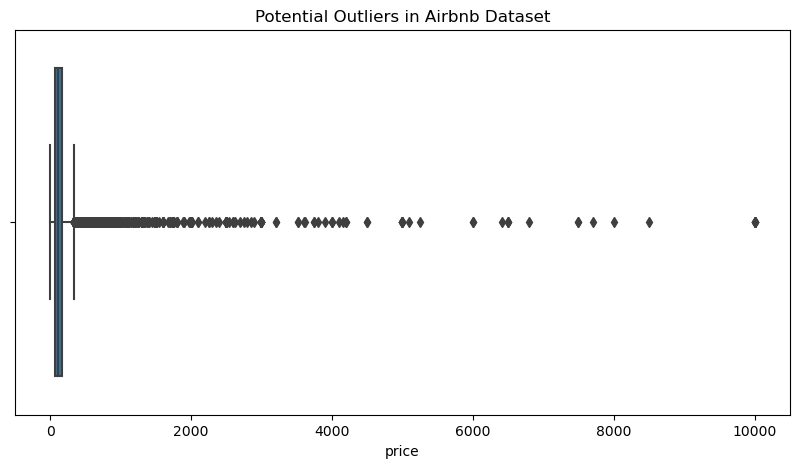

In [24]:
plt.figure(figsize = (10,5))
sns.boxplot(x = Airbnb.price)
plt.title('Potential Outliers in Airbnb Dataset')

The plot above shows there are outliers in the Airbnb price dataset. As most of the prices were well below $2000. However, there are possible of high rental prices due to several factors such as proximity to landmarks, business districts, or popular tourist attractions, luxury amenities, size etc 

Text(0.5, 1.0, 'Potential Outliers in property sales price')

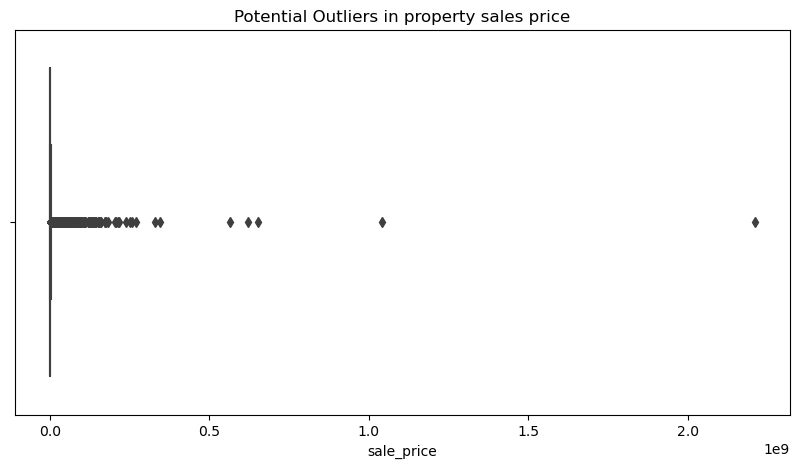

In [25]:
plt.figure(figsize = (10,5))
sns.boxplot(x = Property_df.sale_price)
plt.title('Potential Outliers in property sales price')

## Addressing Price Inconsistencies in Airbnb and Property Datasets

### **Airbnb Dataset**
From the box plot above, it can be observed that in the Airbnb dataset, some prices seem extremely low, likely due to data entry errors. While Airbnb is known for its diverse price range, values too far below the expected rental rate could skew our analysis. 

According to authoritative Airbnb data:
- The **lowest** average rent for a property in New York stands at **$39**.

- On the higher end, the most expensive Airbnb apartment in the New York named the "Millionaires Row Estate" rents up to **$3926** per night according to Apartment Apart, a reputable company that offers serviced apartment and holiday rentals all aorund the world. (https://apartmentsapart.com/new-yorks-most-expensive-airbnb-is-closer-than-you-think/) 

To ensure the data and analysis reflects realistic rental conditions in New York, only properties priced between $39 and $3926(~$4000) will be included in the analysis. 

In conclusion, by refining our datasets to align with market benchmarks, we can ensure a more accurate and insightful analysis.

### **Property Dataset**
Similarly, the Property dataset has instances of houses priced as low as 0,1,2,3, etc. While these values may appear inaccurate at first glance, they could represent ownership transfers or inheritances rather than sales. 

However, extreme outliers, especially at the higher end of the price, need more careful handling. Though it's possible for luxury or historically significant homes to be priced significantly higher than the average, there is a need to set some boundaries based on trusted real estate statistics:
- **PropertyShark**, a reputable real estate data provider, cites the highest median apartment price in the U.S.'s priciest neighborhoods at **$5.84M**.

- **Zillow**, a leading real estate and rental marketplace, has records of properties selling for as low as 40,000 and some of the premium properties fetching up to $50M.

Given these insights, the property dataset sales price will only include properties in the range between 40,000 USD and 50M USD. 

While there are properties that exist beyond the range for both Airbnb and property dataset, narrowing the focus will ensure the analysis captures a more representative cross-section of the market

In [26]:
#checking for properties above $50M.
Property_df[Property_df.sale_price > 50000000]

,borough,neighborhood,zip_code,residential_units,commercial_units,total_units,land_square_feet,year_built,sale_price,sale_date
75,Manhattan,ALPHABET CITY,10002,132,0,132,33650,1989,52625000,2016-10-19
200,Manhattan,ALPHABET CITY,10002,0,0,1,-,1989,52625000,2016-10-19
931,Manhattan,CHELSEA,10001,0,13,13,9875,1906,150000000,2016-12-16
941,Manhattan,CHELSEA,10011,0,4,4,19750,1932,107250000,2017-08-08
950,Manhattan,CHELSEA,10001,0,1,1,9826,2010,139725000,2016-12-05
...,...,...,...,...,...,...,...,...,...,...
66585,Queens,LONG ISLAND CITY,11101,0,0,0,5096,0,173439705,2016-12-08
69905,Queens,REGO PARK,11374,0,10,10,74290,1975,139874900,2017-03-28
72288,Queens,SO. JAMAICA-BAISLEY PARK,11436,335,1,336,75700,1959,58070000,2017-04-21
76697,Staten Island,BLOOMFIELD,10314,0,0,0,2122958,0,67200000,2017-03-10


**Observation**:
The above shows that there are just 121 observations greater than $50M, taking out 121 observations from over 50000 obbservations shouldn't skew our analysis

In [27]:
#filtering out data that falls within the defined range for property prices
clean_property = Property_df[(Property_df.sale_price >= 40000) & (Property_df.sale_price <= 50000000)] 

In [28]:
clean_Airbnb = Airbnb[(Airbnb.price >= 39) & (Airbnb.price <=4000)]

All the datasets are now cleaned and ready for analysis. 

In [29]:
median_price = clean_property['sale_price'].median()
print(median_price)

645000.0


In [30]:
Airbnb_median_price = clean_Airbnb['price'].median()
print(Airbnb_median_price)

110.0


**Observation**: After cleaning of the datasets, the median prices of 645000 and 110 of properties and listing in their Property and Airbnb dataset respective is indicative of real median property and listing prices in New York particularly for the years under study.

## Analysis

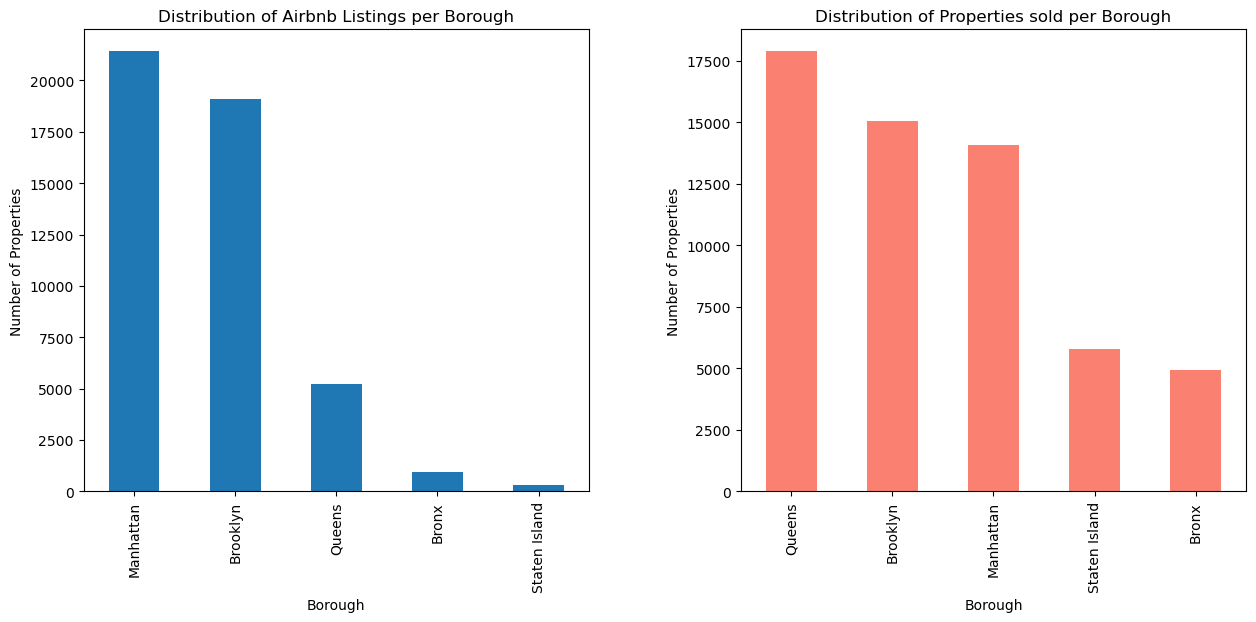

In [31]:
#counting the distribution of properties in property and Airbnb data
Airbnb_borough_distribution = clean_Airbnb.borough.value_counts()
property_borough_distribution = clean_property.borough.value_counts()

# Plotting the distribution of properties across boroughs in Airbnb and Property datasets
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Airbnb dataset
Airbnb_borough_distribution.plot(kind='bar', ax=ax[0])
ax[0].set_title('Distribution of Airbnb Listings per Borough')
ax[0].set_xlabel('Borough')
ax[0].set_ylabel('Number of Properties')


# Property dataset
property_borough_distribution.plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('Distribution of Properties sold per Borough')
ax[1].set_xlabel('Borough', fontsize = 10)
ax[1].set_ylabel('Number of Properties')

#setting the spacing between the charts
plt.subplots_adjust(wspace=0.3)


plt.show()

In [32]:
Airbnb_borough_distribution

Manhattan        21406
Brooklyn         19115
Queens            5222
Bronx              950
Staten Island      324
Name: borough, dtype: int64

In [33]:
property_borough_distribution

Queens           17881
Brooklyn         15056
Manhattan        14070
Staten Island     5787
Bronx             4927
Name: borough, dtype: int64

**Observation**:
In the Airbnb dataset, Manhattan and Brooklyn dominate with the highest number (29406 and 19115 respectively) of listed properties available for rentage.

However, In the Property Sales dataset, Queens has the highest number of properties sold 17881, followed closely by Brooklyn and Manhattan with 15056 and 14070 respectively.


**Brooklyn** and **Manhattan** have the highest number of Airbnb listings, making them popular destinations for short-term rentals.
Queens comes in third, followed by Bronx and Staten Island.

**Brooklyn** and **Manhattan** seem to be the most active boroughs for short-term rentals. This could indicate a higher demand for accommodations in these areas, making them potential targets for investment.

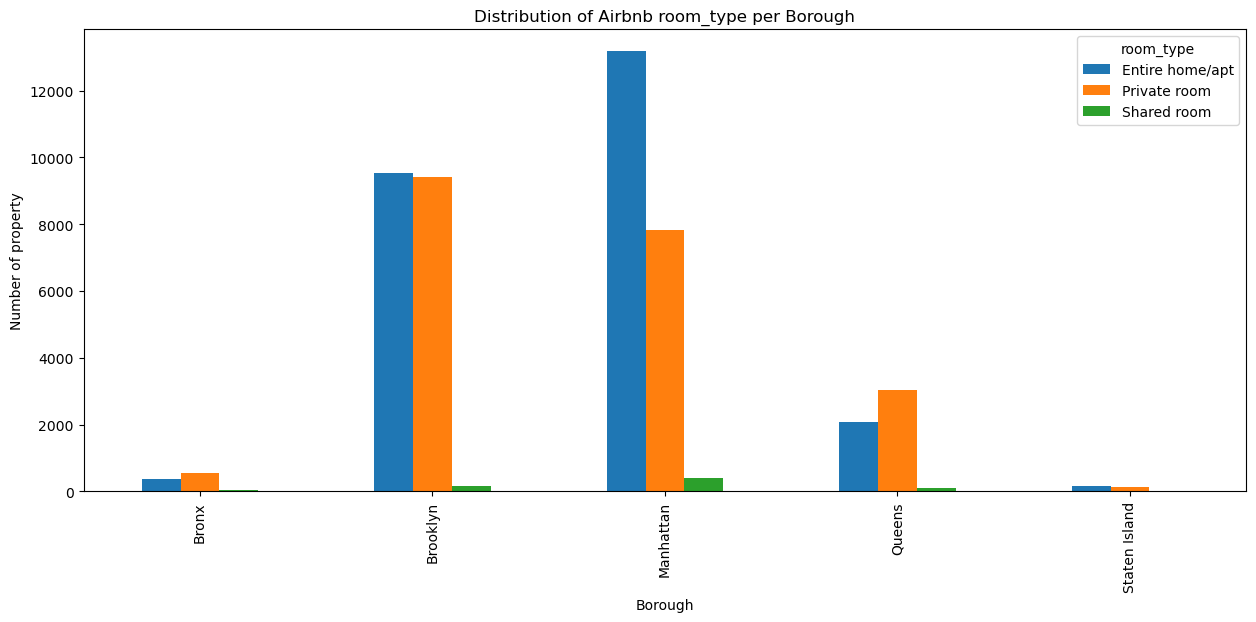

In [34]:
# Distribution of room type per borough
room_type_distribution = clean_Airbnb.groupby(['borough', 'room_type'])['room_type'].count().unstack()

fig, ax = plt.subplots(figsize=(15, 6))

# Average rent price in Airbnb per borough
room_type_distribution.plot(kind='bar', ax=ax)
ax.set_title('Distribution of Airbnb room_type per Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of property')

plt.show()

In [35]:
room_type_distribution

room_type,Entire home/apt,Private room,Shared room
borough,,,
Bronx,376,543,31
Brooklyn,9534,9404,177
Manhattan,13171,7817,418
Queens,2088,3040,94
Staten Island,175,145,4


**Observation**:
From the chart above, **Entire home/apt** followed closely by **Private room** listings dominate in most boroughs, especially in **Manhattan** and **Brooklyn**. This suggests that travelers prefer to rent entire properties rather than shared spaces when visiting New York.

Therefore, the company should prioritize entire homes or apartments, as they are in higher demand.
Private rooms can also be considered.

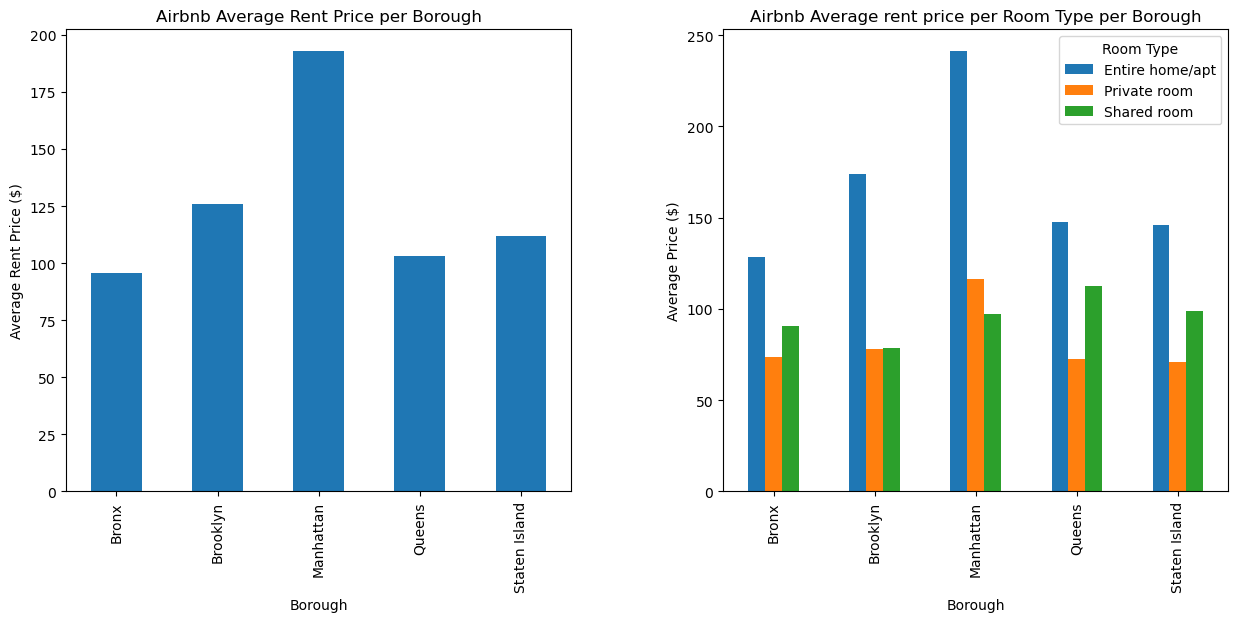

In [36]:
# Average rent price in Airbnb per borough
avg_rent_per_borough = clean_Airbnb.groupby('borough')['price'].mean()

# Distribution of average price per room type per borough
avg_price_per_room_type = clean_Airbnb.groupby(['borough', 'room_type'])['price'].mean().unstack()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Average rent price in Airbnb per borough
avg_rent_per_borough.plot(kind='bar', ax=ax[0])
ax[0].set_title('Airbnb Average Rent Price per Borough')
ax[0].set_xlabel('Borough')
ax[0].set_ylabel('Average Rent Price ($)')


# Distribution of average price per room type per borough
avg_price_per_room_type.plot(kind='bar', ax=ax[1])
ax[1].set_title('Airbnb Average rent price per Room Type per Borough')
ax[1].set_xlabel('Borough')
ax[1].set_ylabel('Average Price ($)')
ax[1].legend(title='Room Type')

#setting the space between the charts
plt.subplots_adjust(wspace=0.3)


plt.show()

In [37]:
avg_rent_per_borough.to_frame().sort_values(by = 'price', ascending = False).reset_index().round(2)

,borough,price
0,Manhattan,192.77
1,Brooklyn,125.81
2,Staten Island,112.05
3,Queens,103.33
4,Bronx,95.89


In [38]:
avg_price_per_room_type.sort_values(by = 'Entire home/apt', ascending = False).reset_index().round(2)

room_type,borough,Entire home/apt,Private room,Shared room
0,Manhattan,241.10,116.45,97.46
1,Brooklyn,173.75,78.10,78.40
2,Queens,147.54,72.67,112.86
3,Staten Island,146.27,71.11,98.75
4,Bronx,128.26,73.77,90.84


**Observation**:

From the chart above, **Manhattan** and **Brooklyn** has the highest average rent price of 192 USD and 125 USD respectively which is expected given its central location and popularity among tourists and business travelers.

Also, on the average, the Entire homes/apartments are generally priced higher than private rooms or shared rooms across all boroughs.

Considering both the number of listings and the average price, **Entire homes/apartments** in **Manhattan** and **Brooklyn** continues to stand out as potential areas for investment. These boroughs have a high demand for short-term rentals and can command higher prices.

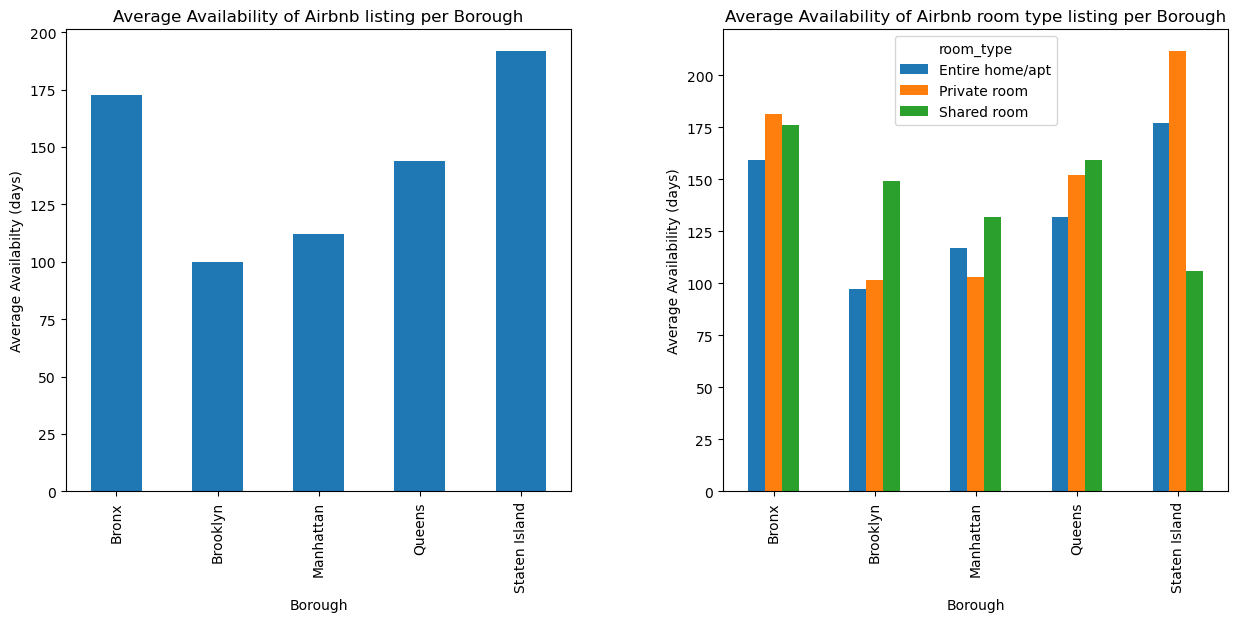

In [39]:
# Availability analysis on the Airbnb dataset
avg_availability_per_borough = clean_Airbnb.groupby('borough')['availability_365'].mean()


#Availability per room type per borough
avg_availability_room_type = clean_Airbnb.groupby(['borough', 'room_type'])['availability_365'].mean().unstack()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Average selling price of property in each borough
avg_availability_per_borough.plot(kind='bar', ax=ax[0])
ax[0].set_title('Average Availability of Airbnb listing per Borough')
ax[0].set_xlabel('Borough')
ax[0].set_ylabel('Average Availabilty (days)')


# Availability analysis on the Airbnb dataset
avg_availability_room_type.plot(kind='bar', ax=ax[1])
ax[1].set_title('Average Availability of Airbnb room type listing per Borough')
ax[1].set_xlabel('Borough')
ax[1].set_ylabel('Average Availability (days)')

#setting the space between the charts
plt.subplots_adjust(wspace=0.3)

plt.show()

In [40]:
avg_availability_per_borough.sort_values(ascending = False).round(2)

borough
Staten Island    191.58
Bronx            172.47
Queens           144.03
Manhattan        112.24
Brooklyn          99.96
Name: availability_365, dtype: float64

In [41]:
avg_availability_room_type.sort_values(by = 'Entire home/apt', ascending = False).round(0).reset_index()

room_type,borough,Entire home/apt,Private room,Shared room
0,Staten Island,177.0,211.0,106.0
1,Bronx,159.0,182.0,176.0
2,Queens,132.0,152.0,159.0
3,Manhattan,117.0,103.0,132.0
4,Brooklyn,97.0,102.0,149.0


**Observation**:

**Staten Island** and **Bronx** properties on Airbnb have the highest average availability, meaning that these properties are available for rent for a larger portion of the year. This indicates low demand or fewer bookings in these locations or hosts probably preferring longer rental durations.

**Brooklyn** has the lowest average availability, followed slightly by **Manhattan** suggesting that properties in these borough are frequently booked or hosts might be offering their properties for shorter durations.

Also, across for room types across the boroughs, shared rooms and private rooms appear to be mostly available which indicates low demand or fewer bookings. **Entire room** has the lowest average availability

This is also a testamnet to the Entire room in Brookyln and Manhattan showing investment potentials

## Geographical Impact 

In [42]:
# base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=11)

# Extract relevant data from the Airbnb dataset
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in clean_Airbnb.iterrows()]

# Custom gradient
gradient = {
    0.0: 'red',
    0.5: 'green',
    1.0: 'blue'
}

# plotting the map
HeatMap(heat_data, radius=8, gradient=gradient, max_val=4000).add_to(m)

# Adding data labels 
borough_coords = {
    'Manhattan': [40.7831, -73.9712],
    'Brooklyn': [40.6782, -73.9442],
    'Bronx': [40.8448, -73.8648],
    'Queens': [40.7282, -73.7949],
    'Staten Island': [40.5795, -74.1502]
}

for borough, coords in borough_coords.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(html=f"""<div style="background-color: transparent; 
        color: black; font-size: 12px; font-weight: bold">{borough}</div>""")
    ).add_to(m)

# Display the map
m


**Observation**:

From the visual representation on the New York map, the insights below were generated:

- **Central Advantage:** The central location of Manhattan and Brooklyn makes them easily accessible and attractive to both tourists and locals. This centrality likely contributes to their higher Airbnb demand and performance.

- **Peripheral Locations:** On the other hand, Staten Island and the Bronx, situated at the outer edges of New York, might face challenges in attracting consistent Airbnb demand. Their peripheral locations could mean longer commute times to central attractions, potentially making them less appealing to short-term visitors.

- **Pricing Indicators:** The blue patches in the map indicates more expensive listings, and as observed there is a concentration of premium and expensive listings in Manhattan, followed by Brooklyn. This aligns with the perception of Manhattan as a premium borough, housing many of New York's luxury accommodations, businesses, and attractions. Brooklyn, with its cultural appeal and proximity to Manhattan, also commands higher prices.

- **Economic Disparities:** The other boroughs, particularly Staten Island and the Bronx, have fewer blue markers, indicating fewer high-priced listings. This could reflect economic disparities, with these boroughs having more budget-friendly accommodations.

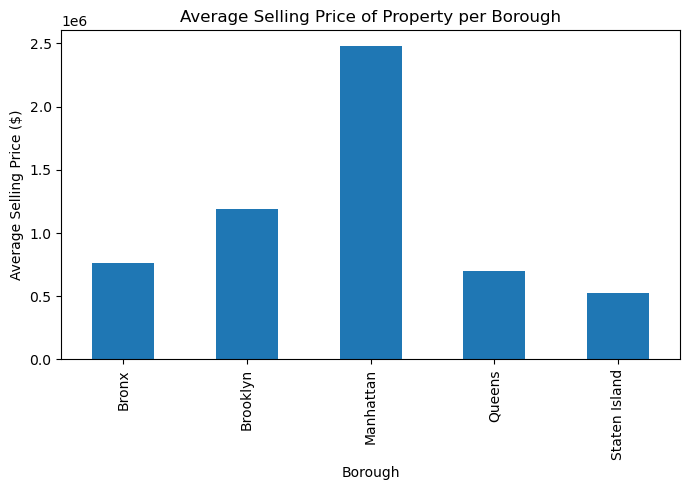

In [43]:
# Average selling price of property in each borough from the property dataset
avg_selling_price_per_borough = clean_property.groupby('borough')['sale_price'].mean()

# Create a figure with one axis
fig, ax = plt.subplots(figsize=(7, 5))

# Average selling price of property in each borough
avg_selling_price_per_borough.plot(kind='bar', ax=ax)
ax.set_title('Average Selling Price of Property per Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Average Selling Price ($)')


plt.tight_layout()
plt.show()


In [44]:
avg_selling_price_per_borough.sort_values(ascending = False)

borough
Manhattan        2.478996e+06
Brooklyn         1.188069e+06
Bronx            7.633668e+05
Queens           6.958492e+05
Staten Island    5.294562e+05
Name: sale_price, dtype: float64

**Observation**

**Manhattan** has the highest average selling price for properties, which aligns with its reputation as one of the most expensive real estate markets in the world.

**Brooklyn** follows Manhattan with a significant average selling price.

**Bronx, Queens, and Staten Island** have relatively lower average selling prices, with Staten Island being the most affordable among the five boroughs.

while Manhattan and Brooklyn have higher property prices, their potential for significant returns, especially in the short-term rental market, makes them attractive investment options. The previous analysis has shown that investing in these boroughs could yield favorable results, given their popularity, demand, and the trends observed in the Airbnb market.

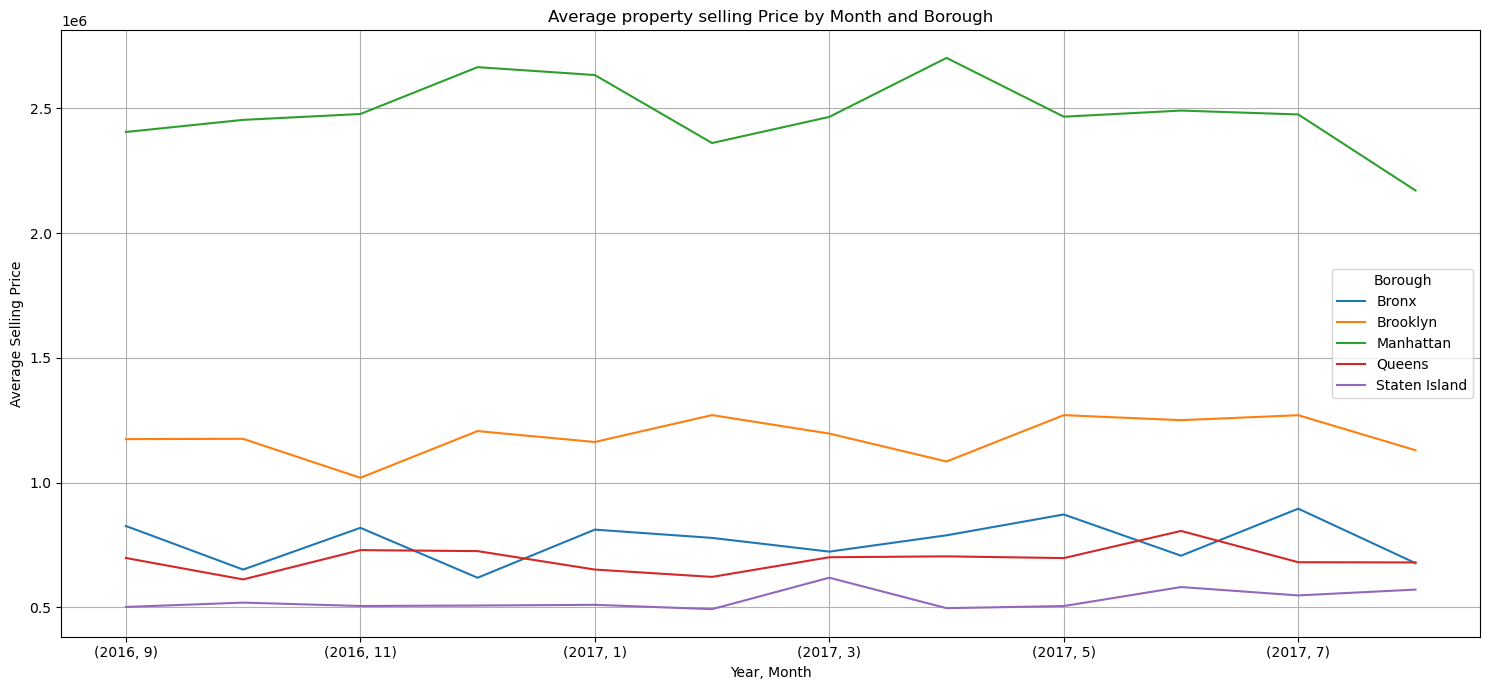

In [45]:
# Extracting month and year from the SALE DATE column in the property dataset
clean_property['Month'] = pd.to_datetime(clean_property['sale_date']).dt.month
clean_property['Year'] = pd.to_datetime(clean_property['sale_date']).dt.year

# Grouping by borough, year, and month to find the average selling price
avg_price_seasonality =clean_property.groupby(['borough', 'Year', 'Month'])['sale_price'].mean().unstack(level=0)

# Plotting the average selling price to check for seasonality
avg_price_seasonality.plot(figsize=(15, 7), title='Average property selling Price by Month and Borough')
plt.xlabel('Year, Month')
plt.ylabel('Average Selling Price')
plt.legend(title='Borough')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation**:

Considering the data is available for a limited period(One Year) it is difficult to make a general conclusion. However, some inferences can be made from the chart above.

**Manhattan:** Property prices seem to peak around the middle of the year (around June) and then decline towards the end of the year.

**Brooklyn:** Prices remain relatively stable throughout the year with slight peaks around the mid-year.

**Queens:** Shows a similar pattern to Brooklyn, with prices being relatively stable.

**Bronx:** Experiences a sharp rise in property prices towards the end of the year.

**Staten Island:** Prices seem to be highest at the beginning and end of the year, with a dip in the middle.
Insights:

It can be infered from the chart that Seasonality does appear to have an effect on property prices in New York, especially in boroughs like Manhattan and the Bronx.
Buying properties in Manhattan around the end of the year seems more cost-effective than in the middle of the year. This could be due to a lot factors such as Weather, Economic Factor, Holidays. The impact of weather on house prices will be explored soon.

### Estimated Gross Annual Return

According to BnBVestor and iProperty Management, which are top platforms that uses Industrial data to help investors with informed decision making on properties and rentals in the United State. The Average occupance rate for Short term let in New York is 56%. This value will be used to calculate the potential annual return on Investment.

Gross Annual Revenue = Average Airbnb Price× Occupancy Rate × 365

In [46]:
import pandas as pd

# Calculate average price per borough
avg_rent_per_borough = clean_Airbnb.groupby('borough')['price'].mean().round(2)

# Calculate Gross Annual Revenue using the formula
occupancy_rate = 0.56  # 56% as a decimal
gross_annual_revenue = round(avg_rent_per_borough * occupancy_rate * 365, 2)

# putting result into a DataFrame
revenue_df = pd.DataFrame({
    'Borough': gross_annual_revenue.index,
    'Average Airbnb Price': avg_rent_per_borough.values,
    'Gross Annual Revenue': gross_annual_revenue.values
})

revenue_df.sort_values(by = 'Gross Annual Revenue', ascending =False)

,Borough,Average Airbnb Price,Gross Annual Revenue
2,Manhattan,192.77,39402.19
1,Brooklyn,125.81,25715.56
4,Staten Island,112.05,22903.02
3,Queens,103.33,21120.65
0,Bronx,95.89,19599.92


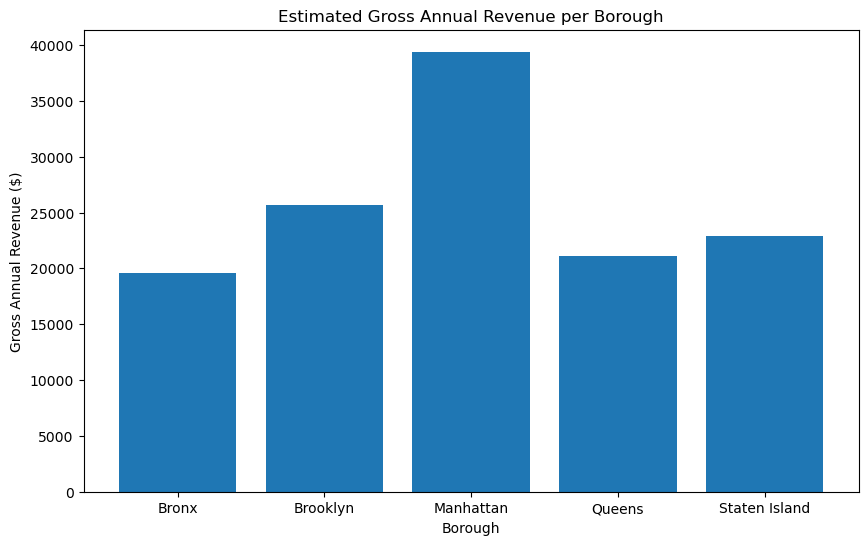

In [47]:
# plotting the gross annual returns
plt.figure(figsize=(10, 6))
plt.bar(revenue_df['Borough'], revenue_df['Gross Annual Revenue'])

plt.title('Estimated Gross Annual Revenue per Borough')
plt.xlabel('Borough')
plt.ylabel('Gross Annual Revenue ($)')

# Display the plot
plt.show()

**Observation**:

**Manhattan and Brooklyn** shows the highest gross annual revenue which indicates good investment opportunity. Although, to acquire a property at these locations seems expensive but their status as prime location, tourist hotspot and top choice fro short let further underscores their potential returns and capital gains over time.

Although Gross Annual Revenue just provides a snapshot of potential earnings, actual returns can vary based on factors like property maintenance costs, property taxes, and fluctuations in demand.

### RECOMMENDATION

Based on the company's mission and the objective of the analysis, Manhattan and Brooklyn emerge as the prime choices. Here's why:

- **High Demand:** Both boroughs consistently show strong demand, thanks to their central locations, business hubs, and cultural attractions.

- **Top Rental Rates:** They command the highest average rental prices, ensuring a steady revenue stream.

- **Appreciation Potential:** Real estate in these areas has historically appreciated, adding long-term value to the investment.

- **Diverse Market:** A mix of tourists, business travelers, and locals seek accommodations here, providing a diverse rental market.

Additionally, the analysis indicates that "Entire home/apt" listings are the most lucrative:

- **Popularity:** These listings are the most preferred among Airbnb guests.

- **Premium Pricing:** They consistently achieve higher rental prices, especially in Manhattan and Brooklyn.

**Conclusion:** For a mix of immediate returns and long-term appreciation, an Entire home/apt property type in Manhattah and/or Brooklyn appears as the best investment option for the company.

### LIMITATIONS
Some limitations to the analysis:

**Data Completeness**: The datasets used for the analysis might not capture the entire New York market. As there could be properties or transactions not listed on Airbnb or in the property sales dataset.

**Lack of historical figures**: The weather and property data were limited in its scope capturing only a year period, this makes it difficult to make general conclusions. A more detailed dataset, extreme weather events, or longer historical data, might provide more insights into its impact on property prices.

**External Factors**: Some otehr factors like economic conditions, regulations, or global events (like pandemics) can significantly impact the property and rental markets. These weren't accounted for in the analysis.